## **1. CLUSTERING K-Means**

### **Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Loading**

---



In [ ]:
# First Create mount the dataset from your google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Take and Read Dataset From Drive
df = pd.read_csv('/content/drive/MyDrive/labkcb6/Galaxy_4.csv')
df

,i,z,class
0,19.16573,18.79371,GALAXY
1,21.16812,21.61427,GALAXY
2,19.34857,18.94827,GALAXY
3,20.50454,19.25010,GALAXY
4,15.97711,15.54461,GALAXY
...,...,...,...
99995,21.30548,20.73569,GALAXY
99996,19.75759,19.41526,GALAXY
99997,17.69034,17.35221,GALAXY
99998,19.07254,18.62482,GALAXY


In [ ]:
df.head()

,i,z,class
0,19.16573,18.79371,GALAXY
1,21.16812,21.61427,GALAXY
2,19.34857,18.94827,GALAXY
3,20.50454,19.25010,GALAXY
4,15.97711,15.54461,GALAXY


### **Data Processing**

---



In [ ]:
# Read dataset
df

,i,z,class
0,19.16573,18.79371,GALAXY
1,21.16812,21.61427,GALAXY
2,19.34857,18.94827,GALAXY
3,20.50454,19.25010,GALAXY
4,15.97711,15.54461,GALAXY
...,...,...,...
99995,21.30548,20.73569,GALAXY
99996,19.75759,19.41526,GALAXY
99997,17.69034,17.35221,GALAXY
99998,19.07254,18.62482,GALAXY


In [ ]:

# Filter data with i
df_filtered = df.loc[df['i'] < 15.0000000]

# Save filter result into csv file
df_filtered.to_csv('databaru.csv', index=False)

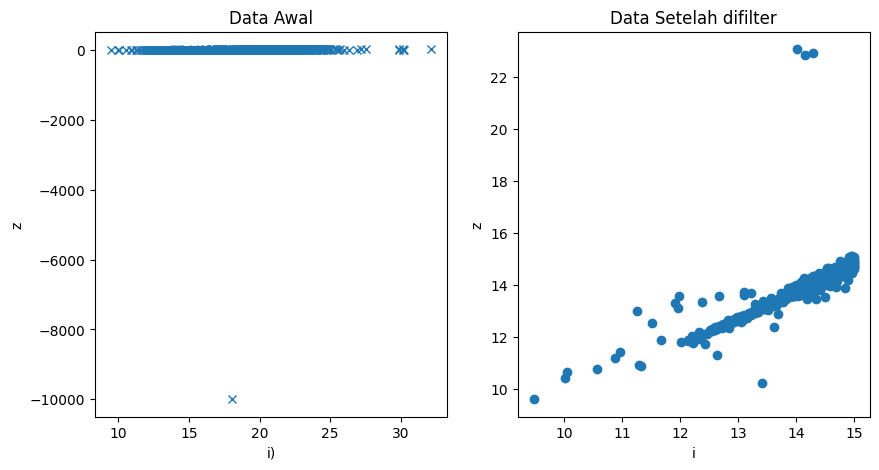

In [ ]:
# Arrange subplot look
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(df['i'], df['z'], 'x')
# Arrange Label and Title into the subplot 1
ax1.set_xlabel('i)')
ax1.set_ylabel('z')
ax1.set_title('Data Awal')

# Plot Data Result into subplot 2
ax2.plot(df_filtered['i'], df_filtered['z'], 'o')

# Arrange Label and Title in subplot 2
ax2.set_xlabel('i')
ax2.set_ylabel('z')
ax2.set_title('Data Setelah difilter')

# Show plot
plt.show()

### **Elbow Method**

In [ ]:
from sklearn.cluster import KMeans

df= df.drop(['class'],axis=1)
clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters=i).fit(df)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

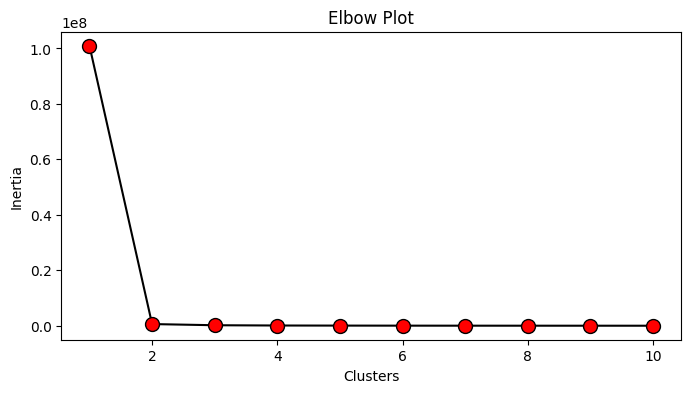

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax2 = plt.subplots(figsize=(8, 4))
# sns.lineplot(x=list(range(1,11)),y=clusters, ax=ax)
plt.plot(list(range(1, 11)), clusters, marker = ".", c= 'black', 
          markerfacecolor = 'red', markersize = 20)
ax2.set_title('Elbow Plot')
ax2.set_xlabel('Clusters')
ax2.set_ylabel('Inertia')

plt.show()

In [ ]:
km=KMeans(n_clusters=5).fit(df_filtered)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add Label Collumn into the dataset
df_filtered['class'] = km.labels_ 

Text(0.5, 1.0, 'KMeans 5 Clusters')

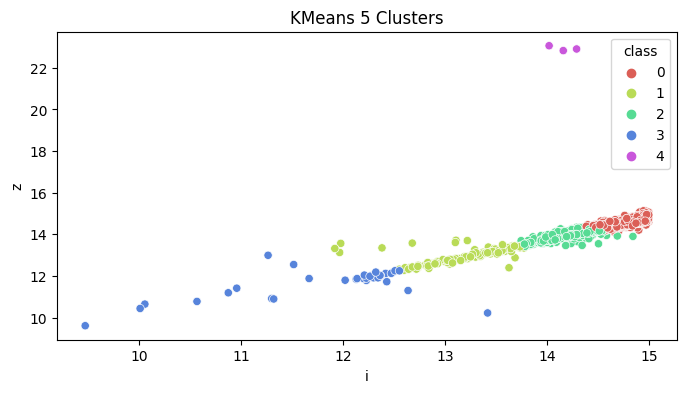

In [ ]:
# Arrange Algorithm Label
plt.figure(figsize=(8, 4))
sns.scatterplot(
  x=df_filtered['i'],
  y=df_filtered['z'],
  hue=df_filtered['class'],
  palette=sns.color_palette('hls', 5)
)
plt.title('KMeans 5 Clusters')

## **2. CLUSTERING DBScan**

with Dataset KNN Before

### **IMPORT LIBRARY**

In [ ]:
# pandas for table
import pandas as pd

# Mathematical calculations
import numpy as np

# Make a Graphic
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Evaluate Model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score

# We used dataset
from sklearn.datasets import make_blobs
from sklearn import datasets

### **Load Data**

In [ ]:
# Put Dataset to table

Galaxy_4 = pd.read_csv('/content/drive/MyDrive/labkcb6/Galaxy_4.csv')

### **Cek Data**

In [ ]:
Galaxy_4

,i,z,class
0,19.16573,18.79371,GALAXY
1,21.16812,21.61427,GALAXY
2,19.34857,18.94827,GALAXY
3,20.50454,19.25010,GALAXY
4,15.97711,15.54461,GALAXY
...,...,...,...
99995,21.30548,20.73569,GALAXY
99996,19.75759,19.41526,GALAXY
99997,17.69034,17.35221,GALAXY
99998,19.07254,18.62482,GALAXY


In [ ]:
# Filter data with i
Galaxyy = df.loc[df['i'] < 15.0000000]

# Save Filter Result to csv file
Galaxyy.to_csv('databaru.csv', index=False)

In [ ]:
Galaxyy.head()

,i,z
202,14.38807,14.31969
238,13.62782,12.39726
297,14.07190,13.78283
523,14.63359,14.50820
547,14.48727,14.17983


### **KMEANS**

In [ ]:
# We use 5 cluster
km5 = KMeans(n_clusters=5).fit(Galaxyy)

# Add Label Collumn named KMeans
Galaxyy.loc[:,'KMeans'] = km5.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-41-d540fb9ca20a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Galaxyy.loc[:,'KMeans'] = km5.labels_


### **DBSCan**

In [ ]:
# Use same parameter
df_filtered = DBSCAN(eps=0.3, min_samples=10).fit(Galaxyy)

# Add Label Collumn DBScan
Galaxyy.loc[:,'DBScan'] = df_filtered.labels_

<ipython-input-44-f4c014e79b01>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Galaxyy.loc[:,'DBScan'] = df_filtered.labels_


In [ ]:
Galaxyy.head()

,i,z,KMeans,DBScan
202,14.38807,14.31969,3,0
238,13.62782,12.39726,1,-1
297,14.07190,13.78283,3,0
523,14.63359,14.50820,0,1
547,14.48727,14.17983,3,0


### **Jalankan Cluster**

---



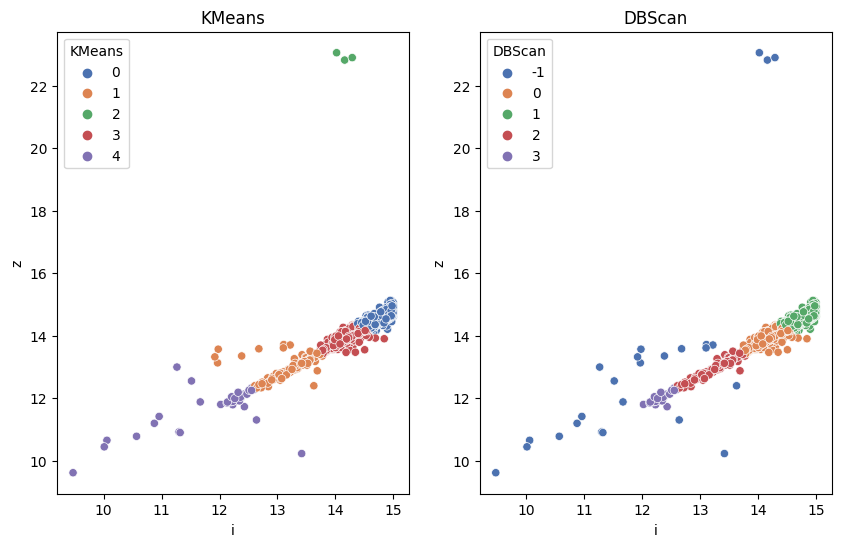

In [ ]:
# Figure with 10 x 6 inci
fig = plt.figure(figsize = (10,6))

# 2 section, 1 Row 2 Collumn in Figure
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Scatterplot into 2 section Figure
sns.scatterplot(
    data=Galaxyy,
    x='i',
    y='z', 
    ax=ax1, 
    hue='KMeans', 
    palette='deep'
)

sns.scatterplot(
    data=Galaxyy,
    x='i',
    y='z', 
    ax=ax2, 
    hue='DBScan',
    palette='deep'
)

# Change Title and Lable Graphic
ax1.set_title('KMeans')
ax1.set_xlabel('i')
ax1.set_ylabel('z')

ax2.set_title('DBScan')
ax2.set_xlabel('i')
ax2.set_ylabel('z')

plt.show()